# Case study on Pre-processing

1. Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [3]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Fill in all the missing values present in all the columns in the dataset

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

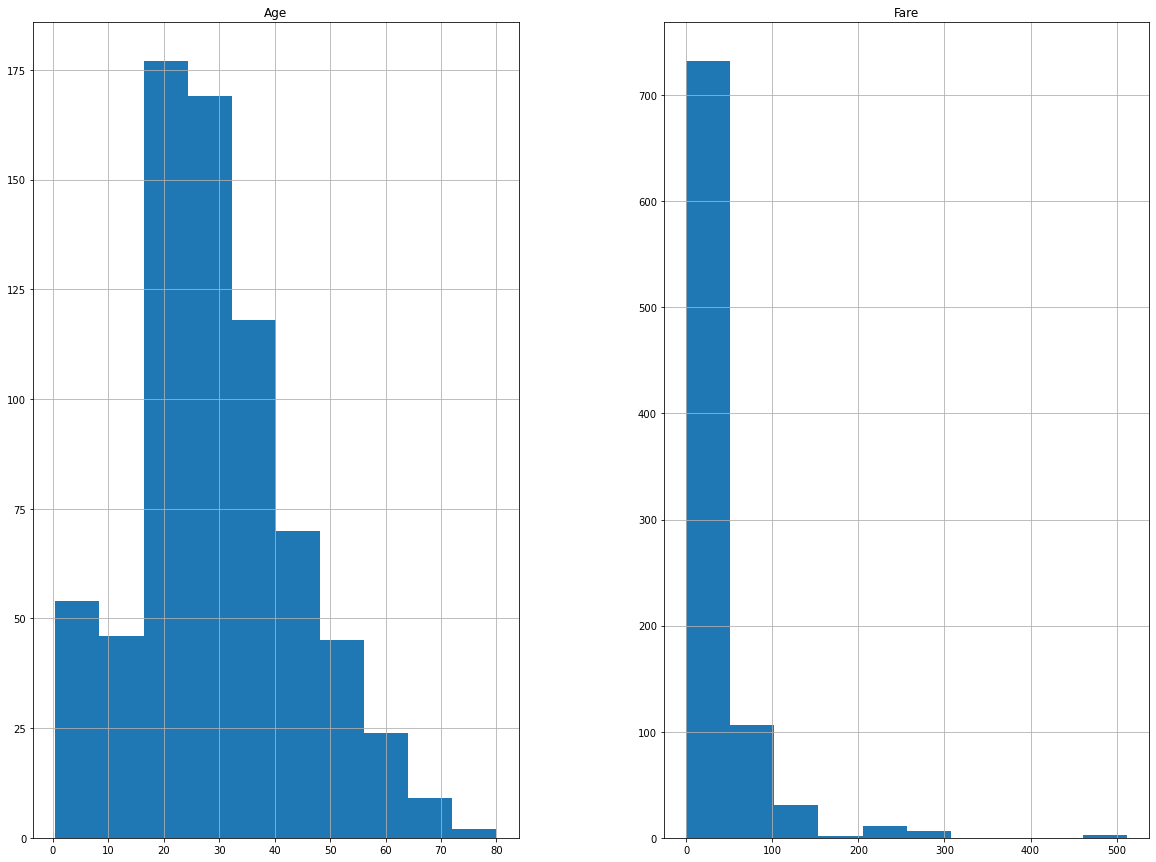

In [8]:
freqgraph = data.select_dtypes(include={'float'})
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
for i in ['Cabin', 'Embarked']:
    data[i]=data[i].fillna(str(data['Cabin'].mode()))

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of SibSp')

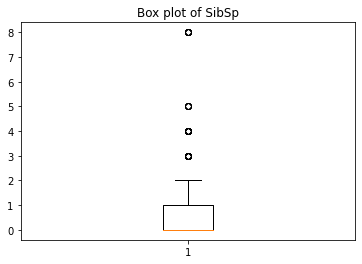

In [13]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [14]:
Q1 =np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 =np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 =np.percentile(data['SibSp'],75,interpolation='midpoint')

IQR=Q3-Q1

low_lim =Q1-1.5*IQR
up_lim =Q3+1.5*IQR


In [15]:
outlier =[]
for x in data['SibSp']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [16]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [17]:
ind1=data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [18]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

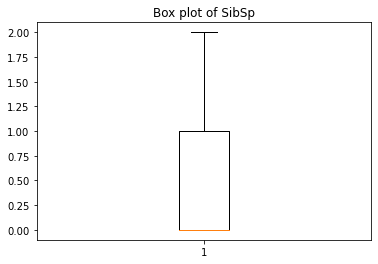

In [19]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Pclass')

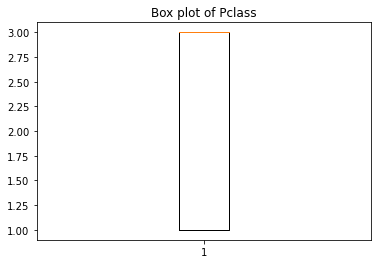

In [20]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of Age')

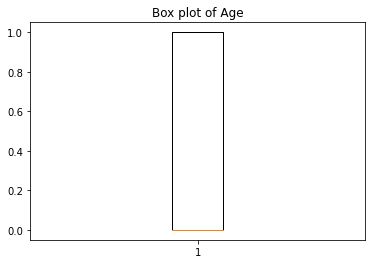

In [21]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Age')

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
data.describe()

In [23]:
y=data['Survived']
x=data.drop('Survived' ,axis =1)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

In [ ]:
x=data.drop('Survived' ,axis =1)

In [ ]:
x.describe()

In [27]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

NameError: name 'preprocessing' is not defined

In [26]:
x=min_max.fit_transform(x)

NameError: name 'min_max' is not defined